# Raspberry price analysis in the spanish market

Market Data Source: 

    Junta de Andalucía (warehouse output prices paid to farmers)

    http://www.juntadeandalucia.es/agriculturaypesca/observatorio/servlet/FrontController?action=Static&subsector=19&url=subsector.jsp

## Import and cleanance

In [1]:
import pandas as pd
import datetime
pd.set_option('display.max_columns',None) ## Display all columns in pandas dataframe  
pd.set_option('display.max_rows',None) ## Display all rows in pandas dataframe 

sheet_name = 'Observatorio de Precios'
rows_skip_13 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
rows_skip_14 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
rows_skip_15 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
cols = [0,1]
file_names_year = [  
                    ['Data/FrambuesaPreciosAgricultor.xls',sheet_name,rows_skip_15,cols,'PriceProducer']\
                  ]
price = pd.DataFrame()
price = pd.read_excel(file_names_year[0][0]\
                               ,sheet_name = file_names_year[0][1]\
                               ,header = 6\
                               ,skiprows = file_names_year[0][2]\
                               ,usecols = file_names_year[0][3])
price.columns = ['Week',file_names_year[0][4]]

for i in range(1,len(file_names_year)):
    price_excel=pd.read_excel(file_names_year[i][0]\
                               ,sheet_name=file_names_year[i][1]\
                               ,header=6\
                               ,skiprows=file_names_year[i][2]\
                               ,usecols=file_names_year[i][3])
    price_excel.columns = ['Week',file_names_year[i][4]]
    price_excel.drop_duplicates(inplace=True)
    price = pd.merge(price,price_excel,\
                      how='left',\
                      on='Week')

price[['Week_No','Year']] = price.Week.str.split(pat='-',expand=True)
price['Date_Ref']=price['Week'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%V-%G-%u') )
price['Year'] = price['Year'].astype('int32')
price['Week_No'] = price['Week_No'].astype('int32')
price.drop(range(0,price.PriceProducer.notna().idxmax()),inplace=True)

## Checks

In [2]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 83 to 314
Data columns (total 5 columns):
Week             232 non-null object
PriceProducer    192 non-null float64
Week_No          232 non-null int32
Year             232 non-null int32
Date_Ref         232 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(2), object(1)
memory usage: 9.1+ KB


In [3]:
price

,Week,PriceProducer,Week_No,Year,Date_Ref
83,38-2015,6.904313,38,2015,2015-09-14
84,39-2015,6.900433,39,2015,2015-09-21
85,40-2015,6.873343,40,2015,2015-09-28
86,41-2015,6.829344,41,2015,2015-10-05
87,42-2015,6.631750,42,2015,2015-10-12
88,43-2015,6.831306,43,2015,2015-10-19
89,44-2015,6.996353,44,2015,2015-10-26
90,45-2015,6.915003,45,2015,2015-11-02
91,46-2015,6.250390,46,2015,2015-11-09
92,47-2015,5.566194,47,2015,2015-11-16


## Average YTD in price

In [4]:
import numpy as np
price_calculated = pd.Series()
for i in range(len(price['Year'].unique())):
    price_selected = price[(price['PriceProducer'].notna()) & (price['Year']==price['Year'].unique()[i])]['PriceProducer']
    price_calculated = price_calculated.append(price_selected.cumsum() / pd.Series(np.arange(1, len(price_selected)+1),price_selected.index))
    price_calculated = (price_calculated.loc[~price_calculated.index.duplicated(keep='first')].sort_index())

price['PriceProducerMean']=price_calculated

# https://stackoverflow.com/questions/21142149/calculate-an-incremental-mean-using-python-pandas
# https://stackoverflow.com/questions/13035764/remove-rows-with-duplicate-indices-pandas-dataframe-and-timeseries

## Main KPIs

In [5]:
pd.set_option('display.max_columns',None) ## Display all columns in pandas dataframe  
pd.set_option('display.max_rows',None) ## Display all rows in pandas dataframe  
summary=(price[price['Year']!=2015][['Year','PriceProducer']].groupby('Year')\
            .describe().unstack(1)).to_frame('Value')\
            .reset_index().sort_values('Year')
del summary['level_0']
summary=summary.pivot_table(index='level_1',columns='Year',values='Value',aggfunc='sum')
summary.reset_index(inplace=True)
#summary.to_excel('summary.xlsx')

In [6]:
max_year=max(price['Year'])
max_week=max(price[price['Year']==max_year]['Week_No'])
last_week_av_price=price[price['Week_No']==max_week][['Year','PriceProducerMean']]
last_week_av_price

,Year,PriceProducerMean
106,2016,4.913705
158,2017,6.780964
210,2018,7.544218
262,2019,6.435338
314,2020,6.550000


In [7]:
# Pass the row elements as key value pairs to append() function 
summary=summary.append({'level_1' : 'Avg Price last week',\
                    2016: last_week_av_price[last_week_av_price['Year']==2016]['PriceProducerMean'].item(),\
                    2017: last_week_av_price[last_week_av_price['Year']==2017]['PriceProducerMean'].item(),\
                    2018: last_week_av_price[last_week_av_price['Year']==2018]['PriceProducerMean'].item(),\
                    2019: last_week_av_price[last_week_av_price['Year']==2019]['PriceProducerMean'].item(),\
                    2020: last_week_av_price[last_week_av_price['Year']==2020]['PriceProducerMean'].item()},ignore_index=True)
summary.to_excel('summary.xlsx')

/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `item` has been deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys


## Plot

In [8]:
import missingno as msno
msno.matrix(price)

In [9]:
import pandas as pd
price.isnull().sum()

Week                  0
PriceProducer        40
Week_No               0
Year                  0
Date_Ref              0
PriceProducerMean    40
dtype: int64

In [10]:
price['Week_No'][price['PriceProducer'].isna()].value_counts().reset_index().sort_values(by='index')

,index,Week_No
10,25,1
9,26,3
8,27,4
7,28,4
6,29,4
5,30,4
4,31,4
3,32,4
2,33,4
1,34,4


***Normally between weeks 26 and 35 there are no sales***

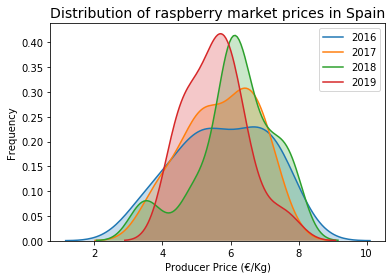

In [11]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
ax = sns.kdeplot(price[price['Year']==2016]['PriceProducer'].dropna(),label='2016', shade=True)
ax = sns.kdeplot(price[price['Year']==2017]['PriceProducer'].dropna(),label='2017', shade=True)
ax = sns.kdeplot(price[price['Year']==2018]['PriceProducer'].dropna(),label='2018', shade=True)
ax = sns.kdeplot(price[price['Year']==2019]['PriceProducer'].dropna(),label='2019', shade=True)
plt.title('Distribution of raspberry market prices in Spain', fontsize=14)
plt.xlabel('Producer Price (€/Kg)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.savefig('distribution_raspberry.png')

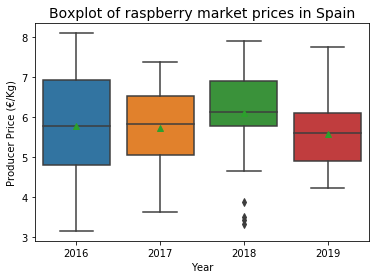

In [12]:
ax = sns.boxplot(x="Year", y="PriceProducer", data=price[price['Year'].isin(['2016','2017','2018','2019'])], showmeans=True)
plt.title('Boxplot of raspberry market prices in Spain', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Producer Price (€/Kg)', fontsize=10)
plt.savefig('boxplot_raspberry.png')

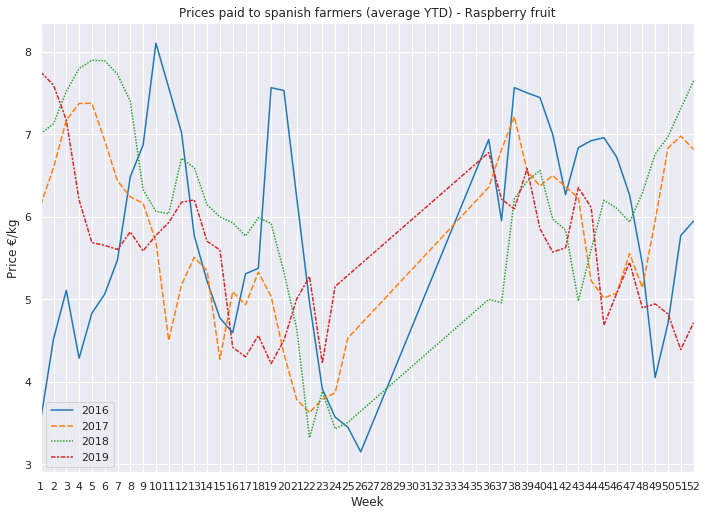

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

s16 = price['PriceProducer'][price['Year']==2016].reset_index()
s17 = price['PriceProducer'][price['Year']==2017].reset_index()
s18 = price['PriceProducer'][price['Year']==2018].reset_index()
s19 = price['PriceProducer'][price['Year']==2019].reset_index()
price_columns=pd.concat([s16, s17, s18, s19], axis=1).reset_index()
price_columns.drop(['level_0','index'],axis=1,inplace=True)
price_columns.columns=['2016','2017','2018','2019']
price_columns.values

values = price_columns.values
dates = pd.date_range("1 1 2016", periods=52, freq="W")
data = pd.DataFrame(values, dates, columns=price_columns.columns)
data.set_index([pd.Index(range(1,53))],inplace=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.lineplot(data=data,\
                  palette="tab10",\
                  linewidth=1.5,style="event")
ax.set_xlim(1,52)
ax.set_xticks(range(1,53))
ax.set(xlabel='Week', ylabel='Price €/kg',title='Prices paid to spanish farmers (average YTD) - Raspberry fruit')
plt.show()

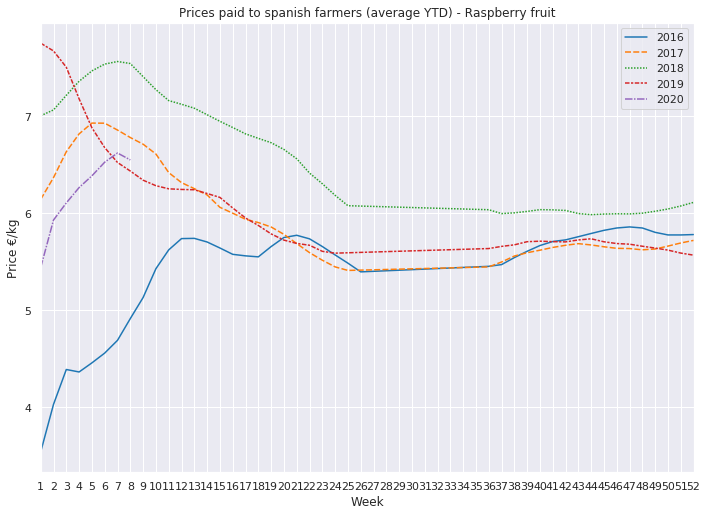

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

s16 = price['PriceProducerMean'][price['Year']==2016].reset_index()
s17 = price['PriceProducerMean'][price['Year']==2017].reset_index()
s18 = price['PriceProducerMean'][price['Year']==2018].reset_index()
s19 = price['PriceProducerMean'][price['Year']==2019].reset_index()
s20 = price['PriceProducerMean'][price['Year']==2020].reset_index()
price_columns=pd.concat([s16, s17, s18, s19, s20], axis=1).reset_index()
price_columns.drop(['level_0','index'],axis=1,inplace=True)
price_columns.columns=['2016','2017','2018','2019','2020']
price_columns.values

values = price_columns.values
dates = pd.date_range("1 1 2016", periods=52, freq="W")
data = pd.DataFrame(values, dates, columns=price_columns.columns)
data.set_index([pd.Index(range(1,53))],inplace=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.lineplot(data=data,\
                  palette="tab10",\
                  linewidth=1.5)
ax.set_xlim(1,52)
ax.set_xticks(range(1,53))
ax.set(xlabel='Week', ylabel='Price €/kg',title='Prices paid to spanish farmers (average YTD) - Raspberry fruit')
plt.show()

In [15]:
data

,2016,2017,2018,2019,2020
1,3.538821,6.142905,7.005429,7.754257,5.440000
2,4.028479,6.367662,7.065904,7.674325,5.930000
3,4.388424,6.634413,7.216684,7.506511,6.106667
4,4.362907,6.818847,7.361423,7.180463,6.265000
5,4.456696,6.929988,7.468296,6.881714,6.386000
6,4.557812,6.928965,7.538448,6.677001,6.526667
7,4.689250,6.858132,7.565165,6.523729,6.621429
8,4.913705,6.780964,7.544218,6.435338,6.550000
9,5.130926,6.712337,7.408915,6.340945,NaN
10,5.428053,6.611131,7.274641,6.284228,NaN


In [16]:
price['Campaign']=price['Year']+(price['Week_No'].apply(lambda x: 0 if x<=27 else 1))